<div style='background-size:30%; background-position: 100% 100%; background-repeat:no-repeat; background-image:url("https://www.mn.uio.no/hylleraas/english/about/internal/graphical-profile/visual-profile/hylleraas-background-3.png"); height: 250px; position: relative; max-width: 100%; display: flex; flex-wrap:wrap;'>
    <div style='width:60%; min-width:130px; flex-grow:1; flex-shrink:0; flex-basis:60%'><h1 style="font-size:30pt; line-height: 1.25em;">&nbsp;<p>Transition State Search on <code style="font-size:30pt;"><span style="font-size:30pt; color:#2b38ff">HSP</span></code></h1></div> 
    <div style="width:15%; flex-grow:1; flex-shrink:0; flex-basis:15%"></div>
    <div style='background-size:75%; background-position: 50% 0%; background-repeat:no-repeat; background-image:url("https://www.mn.uio.no/hylleraas/english/about/internal/graphical-profile/visual-profile/hylleraas-%E2%80%93-logo-%E2%80%93-screen-%E2%80%93-rgb.png"); width:25%; min-width:150px; flex-grow:1; flex-shrink:0; flex-basis:25%'></div>
</div>
<!--<div style='background-size:30%; background-position: 100% 100%; background-repeat:no-repeat; background-image:url("https://www.mn.uio.no/hylleraas/english/about/internal/graphical-profile/visual-profile/hylleraas-background-3.png"); height: 200px; position: relative; max-width: 100%; display: flex; flex-wrap:wrap;'>
    <div style='width:60%; min-width:130px; flex-grow:1; flex-shrink:0; flex-basis:50%'><h1 style="font-size:30pt; line-height: 1.25em;">Introduction to the Hylleraas Software Platform <code><span style="color:#2b38ff">Molecule</span></code> class</h1></div> 
</div>
-->

<h2 style="font-size:20pt;"><p>1. Transition state of water inversion</h2>

<h3 style="font-size:10pt;"><p>1.1 </h3> 

Guess the transition state geometry for the inversion of water. Compute the 2-norm of the gradient with orca (BLYP, def2-SVP) to check how close you are. Remember to store your outputs in a work directory using a `ComputeSettings` object.

_Hint_: you could use `numpy.linalg.norm()`

In [1]:
import hylleraas as hsp
import numpy as np
myenv = hsp.create_compute_settings('local', path = '/Users/tilmann/Downloads/orca_5_0_3_macosx_intel_openmpi411/',work_dir = '/Users/tilmann/Downloads/xtb_wd')
orca = hsp.Method({'qcmethod':['DFT', 'BLYP'], 'basis':'def2-SVP'}, program='orca', compute_settings=myenv)
water = hsp.Molecule({'atoms':['O', 'H', 'H'], 'coordinates':[[0,0,0],[0,0,.9],[0,0,-.9]]})
np.linalg.norm(orca.get_gradient(water))

0.08342693857497728

<h3 style="font-size:10pt;"><p>1.2 </h3> 

Find the transition state for water the water inversion by interpolation: Plot the 2-norm of the gradient versus the O-H distance in the interval [0.5 $a_0$, 1.5 $a_0$] using 10 points. Then refine the interval until the norm is below $10^{-3}$ Hatree/$a_0^3$ .

_Hint_: loop over elements of `np.linspace()`

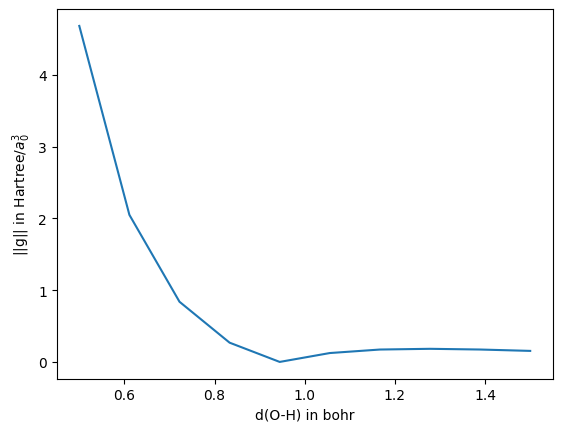

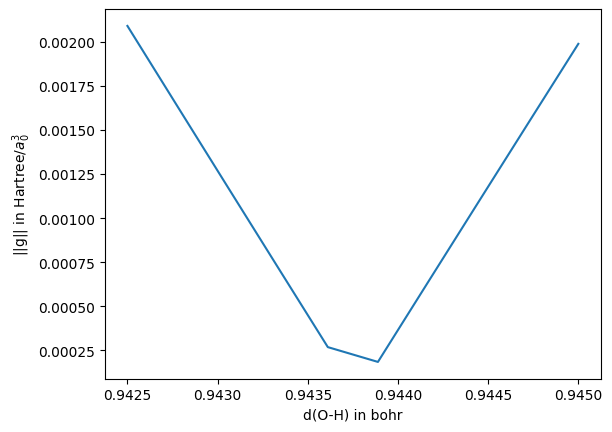

In [2]:
import hylleraas as hsp
import numpy as np
import matplotlib.pyplot as plt
myenv = hsp.create_compute_settings('local', path = '/Users/tilmann/Downloads/orca_5_0_3_macosx_intel_openmpi411/',work_dir = '/Users/tilmann/Downloads/xtb_wd')
orca = hsp.Method({'qcmethod':['DFT', 'BLYP'], 'basis':'def2-SVP'}, program='orca', compute_settings=myenv)
dists1 = np.linspace(.5,1.5,num=10)
dists2 = np.linspace(.9425,.945,num=10)


def compute_pes(distances):
    gradnorms = []
    for dist in distances:
        water = hsp.Molecule({'atoms':['O', 'H', 'H'], 'coordinates':[[0,0,0],[0,0,dist],[0,0,-dist]]})
        gradnorms.append(np.linalg.norm(orca.get_gradient(water)))
    return gradnorms


def plot_pes(distances, gradnorms):
    fig, ax = plt.subplots()
    ax.plot(distances,gradnorms)
    plt.xlabel('d(O-H) in bohr')
    plt.ylabel('||g|| in Hartree/$a_0^3$')
    plt.show()
    
plot_pes(dists1,compute_pes(dists1))
plot_pes(dists2,compute_pes(dists2))

<h3 style="font-size:10pt;"><p>1.3 </h3> 

Discuss the normal modes of water at
1. the minimum geometry
2. transition state geometry

How many vibrational modes do you expect? Characterize all of them (e.g. as symmetric stretch, etc.)

_Hint:_ use `Method.get_normal_modes()` to compute the normal modes 

_Challenge:_ Reduce the representations $\Gamma_{3N}$ of water in $C_{2h}$ and $D_{2h}$, subtract all applicable  translations and rotations. Map the representation of the transitions tate onto $D_{\infty h}$ using ($A_g \mapsto \Sigma_g^+$,  $B_{1g} \mapsto \Sigma_g^- $, $B_{2u}\oplus B_{3u} \mapsto \Pi_u$, $A_g+B_{1g} \mapsto \Delta_g $, etc.) to explain the possible occurance of degenerate modes.


<h3 style="font-size:10pt;"><p>1.3 Solution</h3> 



For water in $C_{2v}$, $3\cdot 3 -6 = 3$  vibrational modes are expected, and $3\cdot 3 - 5 = 4$  for the linear transition state.

From reducing the group reprensentation in $C_{2v}$ we get $\Gamma_{3N}= 3A_1 \oplus A_2 \oplus 2B_1 \oplus 3B_2$, removing translation and rotation, we end up with $2A_1+B_2$ with characterization ($A_1$: symmetric bend, $B_2$: asymmetric strech, $A_1$: symmetric stretch).

In $D_{2h}$, we get $\Gamma_{3N} = A_g \oplus B_{2g} \oplus B_{3g} \oplus 2B_{1u} \oplus 2B_{2u} \oplus 2B_{3u}$. Removing translation and rotation (here only $R_y$, $R_z$), we end up with the 4 vibrations $A_g + B_{1u} + B_{2u} + B_{3u}$ using the mapping we get a symmetric stretch ($\Sigma_g^+$), asymmetric stretch, ($B_{1u}$) and a doubly degenerate bend mode ($\Pi_u$).

In [3]:
import hylleraas as hsp
import numpy as np

myenv = hsp.create_compute_settings('local', path = '/Users/tilmann/Downloads/orca_5_0_3_macosx_intel_openmpi411/',work_dir = '/Users/tilmann/Downloads/xtb_wd')
orca = hsp.Method({'qcmethod':['DFT', 'BLYP'], 'basis':'def2-SVP'}, program='orca', compute_settings=myenv)
dist_tst = 0.944
water_tst = hsp.Molecule({'atoms':['O', 'H', 'H'], 'coordinates':[[0,0,0],[0,0,dist_tst],[0,0,-dist_tst]]})
nm = orca.get_normal_modes(water_tst)
print(nm)

{'frequencies': array([    0.      ,     0.      ,     0.      ,     0.      ,
           0.      , -1535.015014, -1535.015013,  3997.876374,
        4372.498202]), 'normal_modes': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.000

<h3 style="font-size:10pt;"><p>1.4 </h3> 

Visualize the normal modes to confirm your characterization.

_Hint:_ use `Hylleraas.view_vibration()`

In [4]:
hsp.view_vibration(water_tst, nm['normal_modes'][5] ) 

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
# BACKUP
%matplotlib widget


def plot_normal_modes_water(molecule, mode):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*molecule.coordinates[0], color="r", s=100)
    ax.scatter(*molecule.coordinates[1], color="w", s=100)
    ax.scatter(*molecule.coordinates[2], color="w", s=100)
    for i in range(3):
        xyz = molecule.coordinates[i]
        uvw = mode.ravel().reshape(-1,3)[i]
        ax.quiver(*xyz, *uvw, normalize=False, color='b')
    

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])

    plt.show()


In [6]:
# TODO : does this work on NIRD?

from ipywidgets import interact, interactive, fixed, IntSlider
def view_nm(molecule, modes, n):
    return hsp.view_vibration(molecule, modes[n])

interact(view_nm, molecule = fixed(water_tst), modes=fixed(nm['normal_modes']), n=IntSlider(min=0, max=len(nm['normal_modes']), step=1))


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<function __main__.view_nm(molecule, modes, n)>

<h3 style="font-size:10pt;"><p>1.5 </h3> 

Compute the vibrational frequencies from the hessian. Multiply the results by 5140.487143921527 to express the frequencies in $cm^{-1}$.


_Hint:_ use `np.linalg.eigvals()` for computing eigenvalues and `numpy.emath.sqrt()` to take square roots. Atomic masses could be taken from `qcelemental.periodictable.to_mass()`.

_Challenge:_ derive the conversion factor.

In [7]:
hessian = orca.get_hessian(water_tst)
from qcelemental import periodictable as pt

for i in range(len(hessian)):
    atom1 = water_tst.atoms[i//3]
    m1 = pt.to_mass(atom1)
    for j in range(len(hessian)):
        atom2 = water_tst.atoms[j//3]
        m2 = pt.to_mass(atom2)
        hessian[i,j] /= np.sqrt(m1*m2)
        
from qcelemental import constants as qcc
fac =  np.sqrt(qcc.na*qcc.hartree2J*1000)/(qcc.bohr2m)/(2*np.pi*qcc.speed_of_light_in_vacuum*100)
# fac = 5140.487143921527
w = np.linalg.eigvals(hessian)
for ev in w:
    print(np.emath.sqrt(ev)*fac)


3998.296107676478
4372.977277609766
1535.18320198309j
1535.1832012116686j
71.3022587789564
71.3022624831639
0.05100777662014071
0.01794316692598593j
0.018149068737405523j


<h3 style="font-size:10pt;"><p>1.6 </h3> 

Repeat the above calculation using numerical hessians in second order computed from
1. gradients
2. energies

Compare the timings and results.

_Hint:_ use `Hylleraas.NumericalDerivatives.get_hessian(routine, molecule, order)` to compute the numerical hessian. 
    Here, `routine` can be, for example `Method.get_energy()`,`Method.get_gradient_()`, etc.

In [8]:
from qcelemental import periodictable as pt
from qcelemental import constants as qcc
import time

for routine in orca.get_hessian, orca.get_gradient, orca.get_energy:
    print(f'\n routine: {routine}\n')
    start_time = time.time()
    hessian = hsp.NumericalDerivatives.get_hessian(routine, water_tst, 2)
    print(f'Calculation of hessian in {time.time()-start_time:3f} seconds\n')

    for i in range(len(hessian)):
        atom1 = water_tst.atoms[i//3]
        m1 = pt.to_mass(atom1)
        for j in range(len(hessian)):
            atom2 = water_tst.atoms[j//3]
            m2 = pt.to_mass(atom2)
            hessian[i,j] /= np.sqrt(m1*m2)
        
    fac =  np.sqrt(qcc.na*qcc.hartree2J*1000)/(qcc.bohr2m)/(2*np.pi*qcc.speed_of_light_in_vacuum*100)
    # fac = 5140.487143921527
    w = np.linalg.eigvals(hessian)
    for ev in w:
        print(np.emath.sqrt(ev)*fac)
    


 routine: <bound method Orca.get_hessian of <hyif.orca.interface.Orca object at 0x7f93a8bd9880>>

Calculation of hessian in 0.002814 seconds

3998.296107676478
4372.977277609766
1535.18320198309j
1535.1832012116686j
71.3022587789564
71.3022624831639
0.05100777662014071
0.01794316692598593j
0.018149068737405523j

 routine: <bound method Orca.get_gradient of <hyif.orca.interface.Orca object at 0x7f93a8bd9880>>

Calculation of hessian in 66.456450 seconds

(0.38300498728761095+2.0377216153029532e-11j)
(0.38300498728761095-2.0377216153029532e-11j)
1492.5055772718727j
1492.5055772718727j
(4251.7185976942+0j)
(0.3317193724547746+0j)
(3887.0676845445323+0j)
(58.23645403526887+0j)
(58.23645403526779+0j)

 routine: <bound method Orca.get_energy of <hyif.orca.interface.Orca object at 0x7f93a8bd9880>>



KeyboardInterrupt: 

<h3 style="font-size:10pt;"><p>1.7 </h3> 

Reoptimize the transition state structure using the internal transition_state optimizer in orca. For that,  create a new `Hylleraas.Method` object with `{'qcmethod':['DFT', 'B3LYP'], 'basis':'def2-SVP', 'properties':'geometry_optimization'}` and use the `Method.run()` method. Using internal coordinates, inspect the optimized structure and compare to the 'manually' optimized structure.

_Hint:_ you might need to perturb the geometry slightly


In [9]:
%%time
import hylleraas as hsp
myenv = hsp.create_compute_settings('local', path = '/Users/tilmann/Downloads/orca_5_0_3_macosx_intel_openmpi411/',work_dir = '/Users/tilmann/Downloads/xtb_wd')
myenv.clean_work_dir()
orca_ts = hsp.Method({'qcmethod':['DFT', 'BLYP'], 'basis':'def2-SVP', 'properties':'transition_state'}, program='orca', compute_settings=myenv)
dist_tst = 0.944
water_tst = hsp.Molecule({'atoms':['O', 'H', 'H'], 'coordinates':[[0,0.1,0],[0,0,dist_tst],[0,0,-dist_tst]]})
tst_opt=orca_ts.run(water_tst)
tst = hsp.Molecule({'atoms':water_tst.atoms, 'coordinates':tst_opt['final_geometry_bohrs']})
print(tst.internal_coordinates)
orca = hsp.Method({'qcmethod':['DFT', 'BLYP'], 'basis':'def2-SVP'}, program='orca', compute_settings=myenv)
print(orca.get_normal_modes(tst))



{'definitions': [['distance', 0, 1], ['distance', 0, 2], ['angle', 1, 0, 2], ['translation-x', 0, 2], ['translation-y', 0, 2], ['translation-z', 0, 2], ['rotation-a', 0, 2], ['rotation-b', 0, 2], ['rotation-c', 0, 2]], 'values': array([9.77741050e-01, 9.77741050e-01, 1.78183091e+00, 3.33333333e-07,
       3.33333333e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00]), 'contracted': array([[-1.12677674e-17,  0.00000000e+00,  1.24446552e-17,
         8.94242920e-15,  6.53359508e-01,  6.51882248e-16,
         7.07106781e-01, -2.70409604e-01, -9.48119765e-16],
       [ 1.15278815e-17, -6.80537066e-18,  8.52038508e-18,
         8.88977119e-15,  6.53359508e-01,  5.10187389e-16,
        -7.07106781e-01, -2.70409604e-01, -9.35603709e-16],
       [-5.17261337e-19, -2.21492567e-18,  6.41142739e-18,
         5.18959700e-15,  3.82416929e-01,  3.55358246e-16,
        -4.44089210e-16,  9.23989877e-01,  1.17908630e-15],
       [-6.40227365e-03,  4.83350110e-01, -8.75403725e-0

<h2 style="font-size:20pt;"><p>2. Water reaction path</h2>



<h3 style="font-size:10pt;"><p>2.1</h3>

Construct the unrelaxed xtb-PES for the $C_{2V}$-symmetric inversion of water for 30 angles between 90 and 270 degrees and 10 distances between 0.75 and 1.05 bohrs. 

_Hint:_ use a rotation matrix to construct the coordinates for the second H atom, e.g.

    from scipy.spatial.transform import Rotation as R
    r = R.from_euler('x', angle, degrees=True)
    coord2 = r.as_matrix()@ coord1

In [10]:
import numpy as np
import hylleraas as hsp
from scipy.spatial.transform import Rotation as R 


myenv = hsp.create_compute_settings('local', path = '/Users/tilmann/Downloads/orca_5_0_3_macosx_intel_openmpi411/',work_dir = '/Users/tilmann/Downloads/xtb_wd')
nangles=30
ndistances=10
angles = np.linspace(90,270,nangles)
distances = np.linspace(0.75,1.05,ndistances)
pes = np.empty((ndistances, nangles))

xtb = hsp.Method(program='xtb', compute_settings=myenv)
ens = []
xyz_O =  np.array([0,0,0])
for i,dist in enumerate(distances):
    xyz_H1 = np.array([0,0,dist])
    for j,angle in enumerate(angles):
        r = R.from_euler('x',angle, degrees=True)
        xyz_H2 = r.as_matrix()@xyz_H1
        xyz = [xyz_O, xyz_H1, xyz_H2]
        mol = hsp.Molecule({'atoms':['O', 'H', 'H'], 'coordinates':xyz})
        en = xtb.get_energy(mol)
        ens.append(en)
        pes[i,j]=en
 


<h3 style="font-size:10pt;"><p>2.2</h3>

Plot the contour and confirm the coordinates of the minima and transition state visually. 

_Hint_: In your plot function, you could use  

    cp=ax.contourf(angles, distances, pes)
    fig.colorbar(cp) 

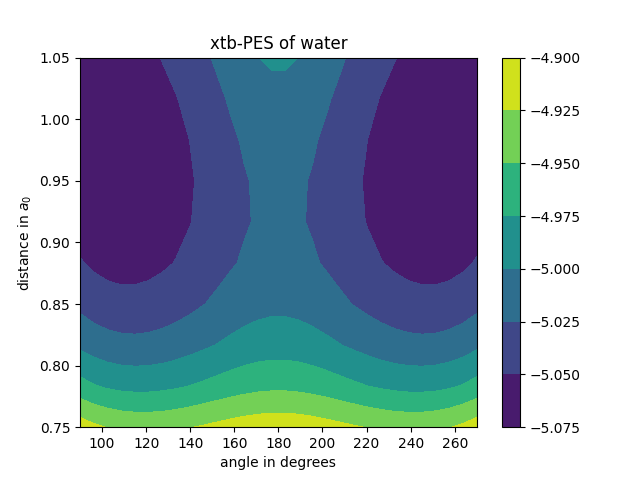

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
cp=ax.contourf(angles, distances, pes)
fig.colorbar(cp) 
ax.set_xlabel('angle in degrees')
ax.set_ylabel('distance in $a_0$')
ax.set_title('xtb-PES of water')
plt.show()

<h3 style="font-size:10pt;"><p>2.3</h3>

Construct the left and right minima structures for water. Verify by include the points into the contour plot.

_Hint:_ perform a geometry optimization for water, translate to the origin and rotate by 180 degrees.

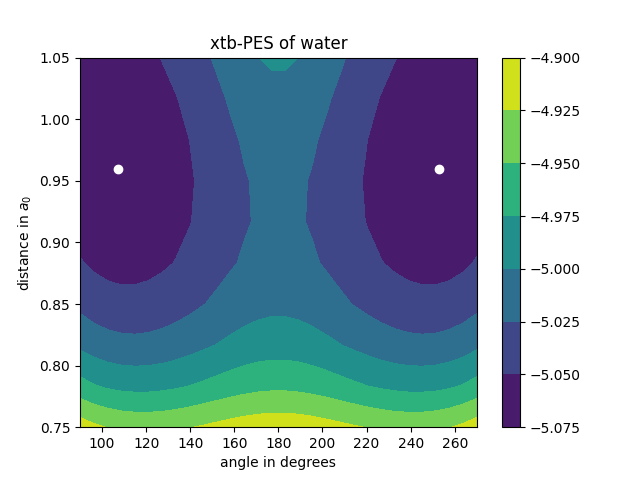

In [12]:
import hylleraas as hsp
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt


water = hsp.Molecule('O')
xtb_geo = hsp.Method({'properties':'geometry_optimization'}, program='xtb')
geo = xtb_geo.run(water)
water1 = hsp.Molecule(geo['optimised_xyz'])
water1 = water1.translate(-water1.coordinates[0])
r = R.from_euler('x',180, degrees=True).as_matrix()
water2= water1.rotate(r)

angle1 = water1.angle(1,0,2)
dist1 = water1.distance(0,1)
angle2 = 360-angle1
dist2=dist1

fig, ax = plt.subplots()
cp=ax.contourf(angles, distances, pes)
fig.colorbar(cp) 
ax.plot([angle1,angle2],[dist1,dist2], 'wo')
ax.set_xlabel('angle in degrees')
ax.set_ylabel('distance in $a_0$')
ax.set_title('xtb-PES of water')
plt.show()

**The Hylleraas Software Platform has recently been expanded with tools for computing transition states and reaction pathways. The corresponding object can be created by:**


    rp = hsp.ReactionPath([reactant, product], method=hsp.Method(program='xtb'), options={'maxrms':1e-3})
    
    
**ReactionPath offers some useful methods, e.g. `interpolate(num)` where `num` is the number of (linearly) interpolated structures to be created (minus the number of already present structures), or `optimize(num)` for optimizing interpolated structures on the reaction pathway.**

_Note:_ the implemented methods are still in a beta phase

<h3 style="font-size:10pt;"><p>2.4</h3>

From a `ReactionPath` object, construct 3 interpolated structures and visualize the on the contour plot.

__Hint:__ use `interpolate(n+m)` to construct $m$ structures from a `ReactionPath` object instantiated from $n$ molecules.

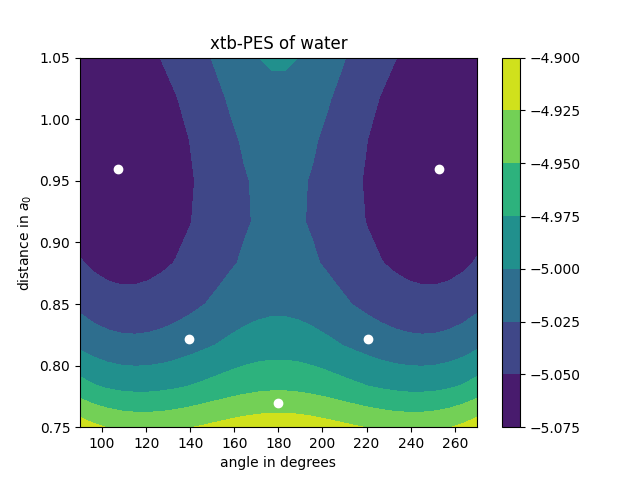

In [13]:
rp = hsp.ReactionPath([water1, water2], method=hsp.Method(program='xtb'))
mols_interpolate = rp.interpolate(5)
angles1=[]
distances1= []
for mol in mols_interpolate:
    hmol = hsp.Molecule(mol)
    angle=hmol.angle(1,0,2)
    if hmol.coordinates[2][1] > 0:
        angle=360-angle
    angles1.append(angle)
    distances1.append(hmol.distance(0,1))
    
fig, ax = plt.subplots()
cp=ax.contourf(angles, distances, pes)
fig.colorbar(cp) 
ax.set_xlabel('angle in degrees')
ax.set_ylabel('distance in $a_0$')
ax.set_title('xtb-PES of water')
ax.plot(angles1,distances1, 'wo')
plt.show()

<h3 style="font-size:10pt;"><p>2.5</h3>

We now consider the optimization of the guess structures constructed above. In order for them to lie on the reaction pathway, a constrained optimization has to be performed.

Construct a new `ReactionPath` object using 1 interpolated structure. Compute the projection matrix 
$P_t = 1-t t^T$ from the second tangent vector obtained from `get_tangents()`. For a gradient-driven optimization, discuss the effect of the substitution $g \to P_t g$.

_Hint:__ you could use `numpy.outer()`



In [14]:
mols_interpolate = rp.interpolate(3)
rp2 = hsp.ReactionPath(mols_interpolate, method=hsp.Method(program='xtb'))
tangents =rp2.get_tangents()
tmat = np.identity(len(tangents[1])) - np.outer(tangents[1], tangents[1])
# print(np.array_str(tmat, precision=1, suppress_small=True))
g = np.array([0,0,0,1,1,0,0,1,0])
g_new = tmat@g
print(f'original gradient\n {g} \n')
print(f'projected gradient\n {g_new} \n')


original gradient
 [0 0 0 1 1 0 0 1 0] 

projected gradient
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
 -5.97475521e-03  6.15981882e-17  0.00000000e+00  6.04701935e-03
  6.08620668e-17] 



<h3 style="font-size:10pt;"><p>2.6</h3>

Consider the original `ReactionPath` object created from the two water structures. Use the `optimize()` method to optimize 3 states on the reaction path. Visualize them structures as red dots on the contour plot.

__Note:__ Some regions in potential energy surfaces can be hard to converge with a given method. Therefore, execute the code below to do the optimization


In [15]:
import hylleraas as hsp
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
import numpy as np

myenv = hsp.create_compute_settings('local', path = '/Users/tilmann/Downloads/orca_5_0_3_macosx_intel_openmpi411/',work_dir = '/Users/tilmann/Downloads/xtb_wd')
myenv.clean_work_dir()
xtb = hsp.Method({'args':['--etemp', '300','--iterations', '500']}, program='xtb', compute_settings= myenv)

water = hsp.Molecule('O')
xtb_geo = hsp.Method({'properties':'geometry_optimization'}, program='xtb', compute_settings= myenv)
geo = xtb_geo.run(water)
water1 = hsp.Molecule(geo['optimised_xyz'])
water1 = water1.translate(-water1.coordinates[0])
r = R.from_euler('x',180, degrees=True).as_matrix()
water2= water1.rotate(r)

rp = hsp.ReactionPath([water1,water2], method=xtb, options={'maxrms':1e-3})
rp.optimize(3)
mols = [hsp.Molecule(mol) for mol in rp.molecules]
rp2 = hsp.ReactionPath(mols, method=xtb, options={'maxrms':1e-2})
rp2.optimize(5)


1 intermediates created.

 Optimizing reaction path:

iteration 0: 0.012741087433265757
iteration 1: 0.012446952463559077
iteration 2: 0.013939158322837507
iteration 3: 0.011857772678823108
iteration 4: 0.004639800979664184
iteration 5: 0.0015339836028424576
iteration 6: 0.00047771110901732557
2 intermediates created.

 Optimizing reaction path:

iteration 0: 0.009299191997527165


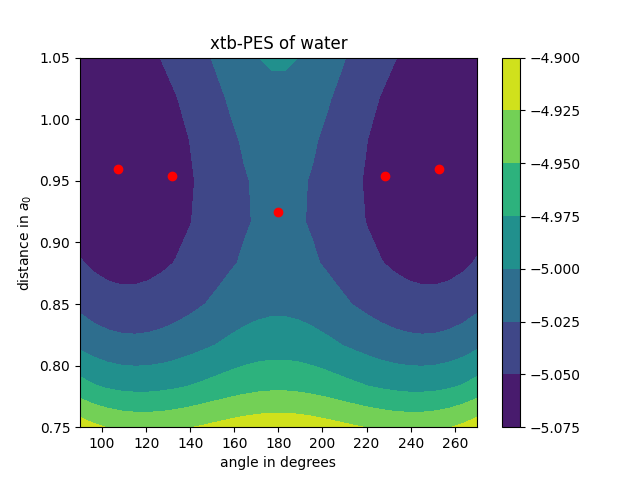

In [16]:
angles2=[]
distances2=[]

for mol in rp2.molecules:
    hmol = hsp.Molecule(mol)
    angle=hmol.angle(1,0,2)
    if hmol.coordinates[2][1] > 0:
        angle=360-angle
    angles2.append(angle)
    distances2.append(hmol.distance(0,1))
    
fig, ax = plt.subplots()
cp=ax.contourf(angles, distances, pes)
fig.colorbar(cp) 
ax.set_xlabel('angle in degrees')
ax.set_ylabel('distance in $a_0$')
ax.set_title('xtb-PES of water')
ax.plot(angles2,distances2, 'ro')
plt.show()

<h3 style="font-size:10pt;"><p>2.7</h3>

Use the `plot()` function or `ReactionPath` to plot an energy diagram for the water inversion.

_Hint:_ use `ReactionPath.plot(reference=n)` to plot energies relative to the $n$th structure.

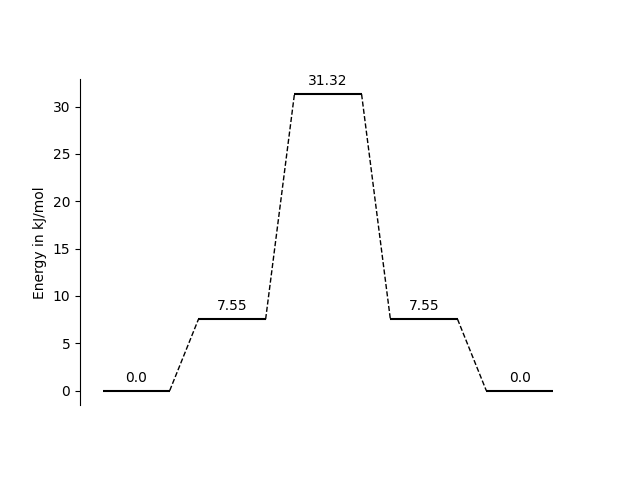

In [17]:
rp2.plot(reference=0)

<h3 style="font-size:10pt;"><p>2.8</h3>

Refine the transition state structure with orca (BLYP/def2-SVP) using the transition state optimizer in geometric ( `options = {'optimization_target':'transition_state'}`).

_HINT_: the `estimate_tst()` function on the `ReactionPath` can be used directly as

    tst_guess = hsp.Molecule(rp2.estimate_tst())

In [18]:
import time
import hylleraas as hsp
myenv = hsp.create_compute_settings('local', path = '/Users/tilmann/Downloads/orca_5_0_3_macosx_intel_openmpi411/',work_dir = '/Users/tilmann/Downloads/xtb_wd')
orca = hsp.Method({'qcmethod':['DFT', 'BLYP'], 'basis':'def2-SVP'}, program='orca', compute_settings=myenv)

tst_guess = hsp.Molecule(rp2.estimate_tst())
geo = hsp.Compute('geometry_optimization',method=orca, molecule=tst_guess, 
                  options={'optimization_target':'transition_state', 
                           'convergence_geometric_criterions':'GAU_VERYTIGHT'})
tst = hsp.Molecule({'atoms':geo.result['atoms'], 'coordinates':geo.result['final_geometry_bohr']})
print(tst.distance(0,1), tst.angle(1,0,2))
tst.view()

 it	      energy        	      ||gradient||  
--------------------------------------------------------------------------------
  0	  -76.28702837543401	    0.03340967222689
  1	  -76.28723641865700	    0.02878375588954
  2	  -76.28786166335300	    0.00173773862462
  3	  -76.28786411637699	    0.00009840760743
  4	  -76.28786412426800	    0.00000355359578

 Geometry optimization converged in 4 steps.

0.9437766237898381 179.99996274340486



    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<h2 style="font-size:20pt;"><p>3. Diels-Alder reaction</h2>


<h3 style="font-size:10pt;"><p>3.1</h3>

Inform yourself about Diels-Alder reactions, preferably ask your favourite chemist.



<h3 style="font-size:10pt;"><p>3.2</h3>

Reoptimize the start and end structures given below with xtb.



In [19]:
start = '''15

C   -1.05403119  -0.85921125  -1.07844148
O   -0.74716995  -1.59204846   0.00037929
C    1.91999122   0.31825506  -0.65929558
C   -1.56348463   0.34378897  -0.70923752
C   -1.05432765  -0.85883374   1.07895685
C    1.92016161   0.31774885   0.65905212
C   -1.56373749   0.34366980   0.70888173
H   -0.86626022  -1.30691107  -2.03849048
H    2.21980037  -0.54462844  -1.23619995
H    1.61547946   1.18008308  -1.23636699
H   -1.89753571   1.13638114  -1.35561033
H   -0.86679445  -1.30614725   2.03907198
H    2.21960266  -0.54586684   1.23524723
H    1.61610877   1.17913244   1.23678680
H   -1.89780281   1.13623322   1.35526633'''

end = '''15

C   -0.33650300  -0.52567500  -1.05221900
O   -0.49920800  -1.44888700   0.00032300
C    1.08232400   0.03657400  -0.76729600
C   -1.29917500   0.57935400  -0.66347200
C   -0.33671300  -0.52527900   1.05252700
C    1.08262000   0.03575900   0.76715400
C   -1.29967800   0.57933100   0.66328300
H   -0.47204500  -0.99959700  -2.02194900
H    1.84062900  -0.63339500  -1.16910900
H    1.22478200   1.02637400  -1.19722100
H   -1.79017300   1.24152200  -1.35666900
H   -0.47213100  -0.99881000   2.02246200
H    1.84129300  -0.63425300   1.16825900
H    1.22479600   1.02528600   1.19777000
H   -1.79081700   1.24169700   1.35615700'''

In [20]:
import hylleraas as hsp


myenv = hsp.create_compute_settings('local', path = '/Users/tilmann/Downloads/orca_5_0_3_macosx_intel_openmpi411/',work_dir = '/Users/tilmann/Downloads/xtb_wd')
xtb_geo= hsp.Method({'properties':'geometry_optimization'}, program='xtb', compute_settings=myenv)
geo1 = xtb_geo.run(hsp.Molecule(start))
m1 = hsp.Molecule(geo1['optimised_xyz'])
geo2 = xtb_geo.run(hsp.Molecule(end))
m2 = hsp.Molecule(geo2['optimised_xyz'])


<h3 style="font-size:10pt;"><p>3.3</h3>

Inspect the structures. Do you assume a large or small barrier?



In [21]:
m1.view()
m2.view()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<h3 style="font-size:10pt;"><p>3.4</h3>

Use the following strategy to find the transition state:

1. create linear interpolated structures
2. guess the transition state structure from the interpolated structures
3. optimize the reation path for 3 structures (with the one intermediate beeing the guessed structure)

_Hint:_ for simplicity, execute the code below


In [22]:
import hylleraas as hsp


myenv = hsp.create_compute_settings('local', path = '/Users/tilmann/Downloads/orca_5_0_3_macosx_intel_openmpi411/',work_dir = '/Users/tilmann/Downloads/xtb_wd')


xtb = hsp.Method( program='xtb', compute_settings=myenv)
rp = hsp.ReactionPath([m1,m2], method = xtb, options={'maxrms': 1e-3})
rp.molecules = rp.interpolate(21)
tst_guess = hsp.Molecule(rp.estimate_tst())
rp = hsp.ReactionPath([m1,tst_guess,m2], method = xtb, options={'maxrms': 1e-3})
rp.optimize()
tst_guess = hsp.Molecule(rp.estimate_tst())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyrp/program.py:230: UserWarning: non-zero gradient norm of estimated TST  (0.1211878856383285)
  warnings.warn(f'non-zero gradient norm of estimated TST  ({grad_norm})')



 Optimizing reaction path:

iteration 0: 0.005451050321042904
iteration 1: 0.004459670135701813
iteration 2: 0.006182679742865411
iteration 3: 0.004945820668225063
iteration 4: 0.003674162837042765
iteration 5: 0.0024286359472588575
iteration 6: 0.0013539061718223912
iteration 7: 0.0013355701201442328
iteration 8: 0.0005330286588947141


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/hyrp/program.py:230: UserWarning: non-zero gradient norm of estimated TST  (0.010546153035007977)
  warnings.warn(f'non-zero gradient norm of estimated TST  ({grad_norm})')


<h3 style="font-size:10pt;"><p>3.5</h3>

Plot the energy diagram for the Diels-Alder reaction.

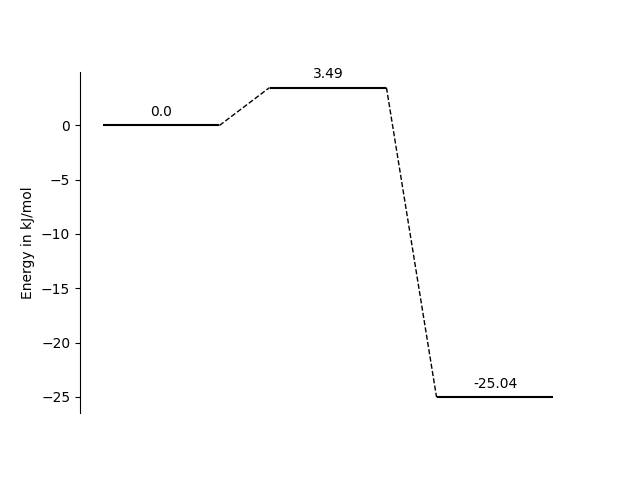

In [23]:
rp.plot(reference=0)

<h3 style="font-size:10pt;"><p>3.6</h3>

Animate the Diels-Alder reaction using `Hylleraas.view_trajectory()`

_Hint:_ you can modify the speed by adding `options={'animate_interval': number ` with `number` beeing an integer, default is 300.

In [24]:
hsp.view_trajectory(rp.interpolate(20), options={'animate_interval':100})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol